In [1]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import euclidean_distances, pairwise_distances
from sklearn.metrics.pairwise import manhattan_distances
from background.clustering.code.distance.minkowski_distance import MinkowskiDistance
from background.clustering.code.distance.mahalanobis_distance import MahalanobisDistance
from sympy import symbols
from background.clustering.code.distance.bregman_divergence import BregmanDivergence
from background.clustering.code.distance.power_distance import PowerDistance

In [2]:
# Create dummy data
x = np.array([1.0, 2.0])
y = np.array([3.0, 5.0])

## Minkowski Distance

Minkowski distance is a generalization of distance metrics such as Manhattan, Euclidean, and Chebyshev. The formula for Minkowski distance is given by:
$$ ∀(x,y) \in \mathbb{R^2} \quad d(x, y) = (∑_{i=1}^{n} |x_i - y_i|^p)^{1/p}, \quad p \in [1,  ∞[ $$

Minkowski distances have two key limitations in high-dimensional spaces:
1. Curse of dimensionality: As the number of dimensions increases, the distance between points becomes less meaningful.
2. All dimensions are treated equally: Minkowski distance does not account for the importance of different dimensions.

If $p \in [0, 1[$, the Minkowski distance is not a metric because it does not satisfy the triangle inequality.


### Manhattan Distance
Manhattan distance is a special case of Minkowski distance with $p=1$. It is computed as:
$$ d(x, y) = ∑_{i=1}^{n} |x_i - y_i| $$

Manhattan distance: 5.0


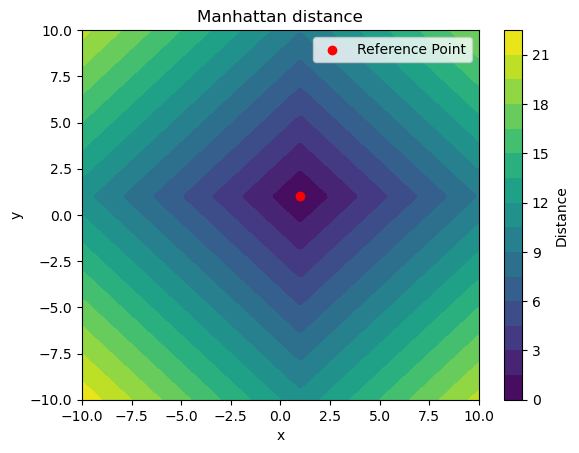

In [3]:
manhattan_distance = MinkowskiDistance.manhattan_distance(x, y)
print(f'Manhattan distance: {MinkowskiDistance.manhattan_distance(x, y)}')

# Compare with scikit-learn's implementation
manhattan_distance_sklearn = manhattan_distances([x], [y])
assert manhattan_distance == manhattan_distance_sklearn[0][0]

MinkowskiDistance(p=1).visualize(reference_point = np.array([1, 1]), title="Manhattan distance")

### Euclidean Distance
Euclidean distance is a special case of Minkowski distance with $p=2$. It is computed as:
$$ d(x, y) = \sqrt{∑_{i=1}^{n} (x_i - y_i)^2} $$

Euclidean distance: 3.605551275463989


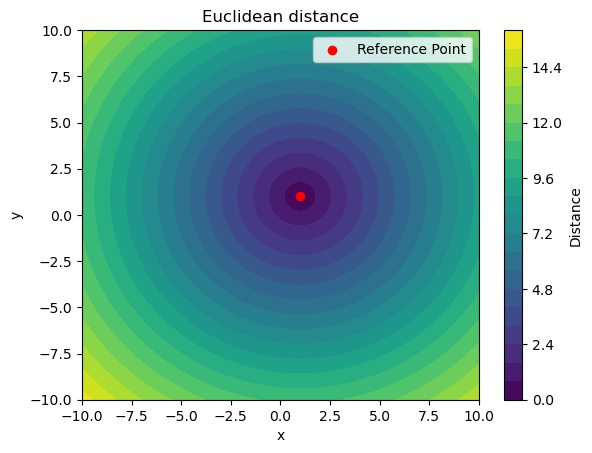

In [4]:
euclidean_distance = MinkowskiDistance.euclidean(x, y)
print(f'Euclidean distance: {MinkowskiDistance.euclidean(x, y)}')

# Compare with scikit-learn's implementation
euclidean_distance_sklearn = euclidean_distances([x], [y])

assert euclidean_distance == euclidean_distance_sklearn[0][0]

# Visualize the distance field
MinkowskiDistance(p=2).visualize(reference_point = np.array([1, 1]), title="Euclidean distance")


### Chebyshev Distance
Chebyshev distance is a special case of Minkowski distance with $p=∞$. It is computed as:
$$ d(x, y) = \max(|x_i - y_i|) $$

Chebyshev distance: 3.0


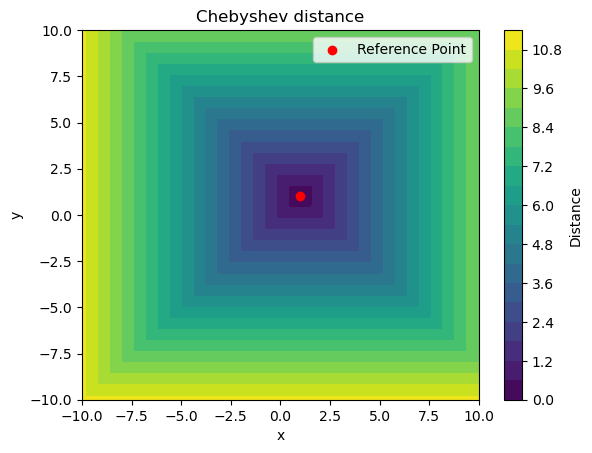

In [5]:
chebyshev_distance = MinkowskiDistance.chebyshev(x, y)
print(f'Chebyshev distance: {MinkowskiDistance.chebyshev(x, y)}')

# Compare with scikit-learn's implementation
chebyshev_distance_sklearn = pairwise_distances(x.reshape(1, -1), y.reshape(1, -1), metric='chebyshev')

assert chebyshev_distance == chebyshev_distance_sklearn[0][0]

# Visualize the distance field
MinkowskiDistance(p=float('inf')).visualize(reference_point = np.array([1, 1]), title="Chebyshev distance")

## Mahalanobis Distance
Mahalanobis distance is a measure of the distance between a point and a distribution. It is computed as:
$$ d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)} $$
where $S$ is the covariance matrix of the data. Mahalanobis distance accounts for the correlations between variables and is useful for high-dimensional data.
The covariance matrix is a square matrix giving the covariance between each pair of elements of a random vector. The diagonal elements of the covariance matrix are the variances of each element of the vector, it's defined as:
$$ S = \frac{1}{n} ∑_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x})^T \quad \text{avec} \quad  \bar{x} = \frac{1}{n} ∑_{i=1}^{n} x_i $$

Mahalanobis distance is useful in identification of the outliers in the dataset. It is also used in clustering algorithms like K-means and DBSCAN.

Mahalanobis distance: 0.6182813239386878


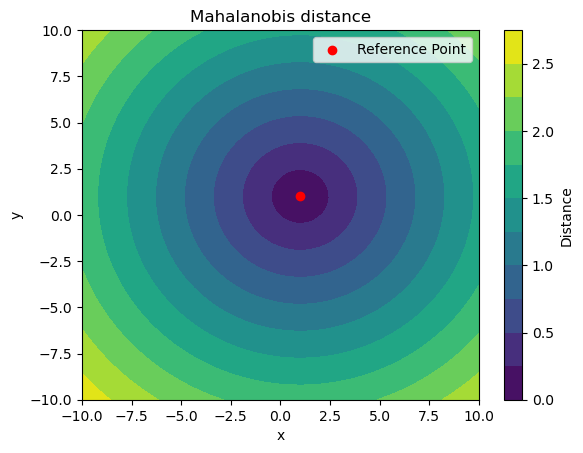

In [6]:
_x = np.linspace(-10, 10, 100)
_y = np.linspace(-10, 10, 100)
_X, _Y = np.meshgrid(_x, _y)

# Combine grid points into a dataset of 2D points
data = np.c_[ _X.ravel(), _Y.ravel()]

# append np.array([x, y])
data = np.vstack((data, np.array([x, y])))

covariance_matrix = np.cov(data.T)

manhattan_distance = MahalanobisDistance(covariance_matrix)
distance = manhattan_distance.compute(x, y)
print(f'Mahalanobis distance: {distance}')

# Compute the inverse of the covariance matrix
VI = np.linalg.inv(covariance_matrix) # Covariance requires transposed data (features in columns)

# Compare with scikit-learn's implementation
mahalanobis_distance_sklearn = pairwise_distances([x], [y], metric='mahalanobis', VI=VI)
assert distance == mahalanobis_distance_sklearn[0][0]

# Visualize the distance field
manhattan_distance.visualize(
    reference_point = np.array([1, 1]),
    title="Mahalanobis distance",
    levels=10,
    cmap="viridis"
)

## Bregman Divergence
Bregman divergence is a generalization of the squared Euclidean distance. It is defined as:
$$ D_f(x, y) = f(x) - f(y) - \nabla f(y)^T (x - y) $$
where $f$ is a convex function. Bregman divergence is a measure of the difference between the value of a function at two points and the value of a linear approximation of the function at one of the points.
$\nabla f(y)$ is the gradient of the function $f$ at point $y$.
Bregman divergence is used in optimization algorithms such as the Bregman proximal point method and the Bregman ADMM algorithm.

Bregman Divergence: -13.0


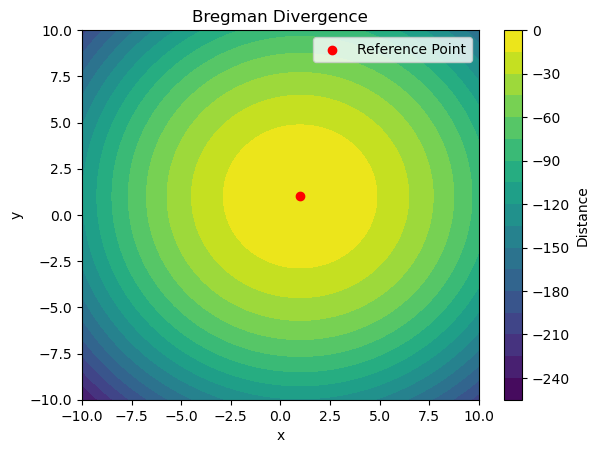

In [7]:
# Define a convex function
x1, x2 = symbols('x1 x2')
f = x1 ** 2 + x2 ** 2

# Create a Bregman Divergence instance
bregman = BregmanDivergence(f=f, vars=[x1, x2])

distance = bregman.compute(x, y)
print(f'Bregman Divergence: {distance}')

# Visualize the distance field
bregman.visualize(
    reference_point = np.array([1, 1]),
    title="Bregman Divergence",
)

## Cosine Distance
Cosine distance is a measure of similarity between two non-zero vectors of an inner product space. It is computed as:
$$ d(x, y) = 1 - \frac{x^T y}{||x||_2 ||y||_2} $$
where $x \cdot y$ is the dot product of $x$ and $y$, and $||x||$ is the Euclidean norm of $x$.
Cosine distance is useful for text mining, document clustering, and collaborative filtering.

Cosine distance: 0.002945514498418511


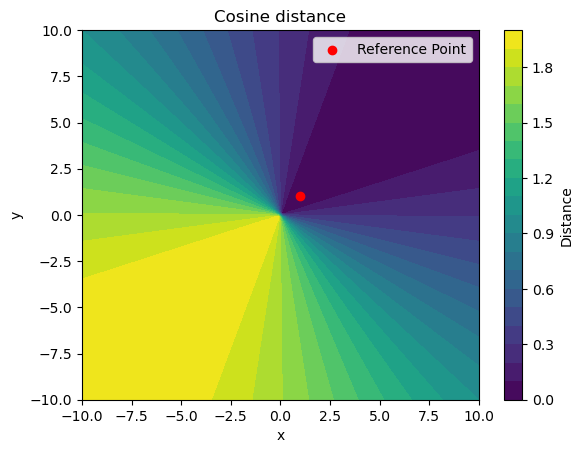

In [8]:
cosine_distance = PowerDistance.cosine_distance(x, y)
print(f'Cosine distance: {cosine_distance}')

cosine_distance_sklearn = pairwise_distances([x], [y], metric='cosine')

assert np.isclose(cosine_distance, cosine_distance_sklearn[0][0])

# Visualize the distance field
PowerDistance(1).visualize(
    reference_point = np.array([1, 1]),
    title="Cosine distance"
)

## Power Distance
Power distance is a generalization of the cosine distance. It is computed as:
$$ d(x, y) = 1 - \frac{(x^T y)^p}{||x||_2^p ||y||_2^p} $$
where $p$ is a parameter that controls the influence of the dot product term.

If $p=1$, the Power distance is equivalent to the cosine distance.

Power distance is useful for applications where the importance of different dimensions varies. By adjusting the power parameter $p$, we can control the influence of the dot product term in the distance computation.

Power Distance: 0.005882352941176672


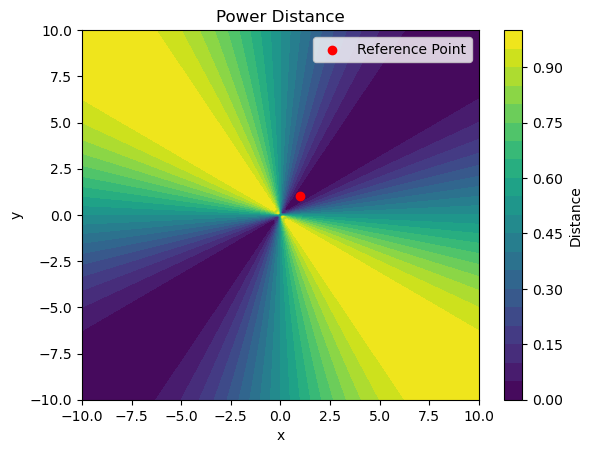

In [10]:
# Create a PowerDistance instance with p=2
power_distance = PowerDistance(p=2)

# Compute the Power Distance between x and y
distance = power_distance.compute(x, y)
print(f'Power Distance: {distance}')

# Visualize the distance field
power_distance.visualize(
    reference_point = np.array([1, 1]),
    title="Power Distance",
)

# Conclusion
In this notebook, we explored different distance metrics such as Minkowski distance, Mahalanobis distance, Bregman divergence, cosine distance, and power distance. These distance metrics are widely used in machine learning, optimization, and data analysis applications. By understanding the properties and use cases of different distance metrics, we can choose the most appropriate metric for our specific problem and improve the performance of our algorithms.